<div class="usecase-title">Endemic Species Planting in laneways - User interactive</div>

<div class="usecase-authors"><b>Authored by: </b>Alison Collins</div>
<div class="usecase-duration"><b>Duration: </b>60 mins</div>
<div class="usecase-level"><b>Level: </b>beginner</div>
<div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>

<div class="usecase-section-header">Scenario</div>

1. I am a resident living in Melbourne who wishes to take part in the greening Melbourne's laneways program. I want to know the best native species to plant in the laneway near me.

2. I am a city planner involved in the Green Your Laneway program and I wish to know which native plants would be suited to the laneway I am considering for planting.

At the end of this use case you will be able to:
* Import data using API v2.1
* Preprocess data including mapping categorical data to numerical
* Use input function to allow user interaction
* Create dynamic graph
* Open webpage direct from use case code

<div class="usecase-section-header">Why the interest in laneway greenery?<div>

##### **The benefits of planting vegetation in cities includes:**
- oxygen production for fresh air to breathe
- storage of carbon dioxide, helping reduce green house gases
- trees absorb water, helping reduce flooding events
- evapotranspiration from leaves produces a cooling effect, reducing heat waves
- provide habitats for wildlife
- trees reduce cortisol in our brains, improving mental health and wellbeing

More information:
https://www.treesforcities.org/stories/trees-in-our-cities-10-reasons-we-need-to-plant-more

##### **Why plant native species?**
- these species are naturally homes to native wildlife, so encourging native wildlife numbers
- they are adapted to the environment, requiring less time in maintinence
- helps prevent biodiversity, reduing species loss and regaining historical species balance

More information: https://resources.austplants.com.au/information/gardening-with-native-plants/

<div class="usecase-section-header">Relevant datasets<div>

[Pre-Colonial Plant List](https://data.melbourne.vic.gov.au/explore/dataset/pre-colonial-plant-list/export/)

- The flora of Melbourne species list was compared again histroical observation records and specimens to determine historical occurence of flora in the city. Plant names as well as growing environment can be found in this dataset. The plants have been rated as most likely to be found in each environment. The highest rating is 3.2. Only plants rated 3.2 will be returned in this Use Case (but there is opportunity for the user to adjust this value).

[Laneways with Greening Potential](https://data.melbourne.vic.gov.au/explore/dataset/laneways-with-greening-potential/export/)
- The City of Melbourne collected data analysing the best potential type of plantings in each of the city laneways; farm plantings, park species, vertically growing species and forest type species. Each type of planting was given a categorical value of potential for types of planting: Highest, Good, Some or Lowest. For analysis these categorical values were converted into numerical values using the following table:
<div align = "center">

| Categorical Value | New Value |
|:-----------------:|:---------:|
| Highest Potential |     4     |
|   Good Potential  |     3     |
|   Some Potential  |     2     |
| Lowest Potential  |     1     |

</div>


<div class="usecase-section-header">Exploratory data analysis steps</div>

1. Import modules
2. Access and read in data sets
3. Undertake preprocessing
4. Working code for use case:
    1. User input
    2. Dynamic graph
    3. Redirection to external webpage
    4. Dynamic table

##### **Import Modules**

In [10]:
# Import required modules
import requests
import pandas as pd
import matplotlib.pyplot as plt
import webbrowser
from tkinter import *

##### **Access and read in datasets**

In [11]:
# Function to get data from website using API
def get_data_single(base, SPECIFIC_PATH, apikey, offset=0):    
    # Set the filters, limit retrieves 20 rows at a time, offset says where to start data collection
    filters = f'records?limit={100}&offset={offset}&timezone=UTC'
    # Make the url from base, data url and filters variables stored ouside loop
    url = f'{base}{SPECIFIC_PATH}/{filters}&apikey={apikey}'
    # print(url) - can be used locally to check if code is working if 404 error given
    # Use the requests function to get the data
    result = requests.get(url)
    # Check that the request works, error code 200 = successful
    if result.status_code == 200:
        # Save results as a json file
        result_json = result.json()
        # Store a variable of max_results with total of dataset
        max_results = result_json['total_count']
        # Save the results key data to a list variable
        records = result_json['results']
    else:
        # If data is not collected correctly return the error
        print("ERROR GETTING DATA: ", result.status_code)
        max_results = 0
        records = []
    # At end of function, return the json results in records, max_results count and offset
    return [records, max_results, offset]

def fetch_all_data(SPECIFIC_PATH):
    # Collect data from API
    # Set offset increment
    # (needs to match offset in get data function)
    OFFSET_INCREMENT = 100
    # Base url (this should be the same for all datasets)
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    # Set your API key with user entry
    apikey = input("Please enter your api key")   
    # Call the get data function, passing in variables above, save to result
    result = get_data_single(base_url, SPECIFIC_PATH, apikey)
    # Save the records data returned in the get_data function to records list variable
    records = result[0]
    # Save the dataset size data returned in the get_data function to max_results variable
    max_results = result[1] 
    # Increase the offset returned in the get_data function (result[2]) by the offset increment
    offset = result[2] + OFFSET_INCREMENT
    # Check the length of the data returned and compare it against the max_results variable
    # If the length o fthe data is less than the max_results, run the while loop
    while len(records) != max_results:
        # Call the get data function again, passing in url, specific path and new offset value
        data = get_data_single(base_url, SPECIFIC_PATH, apikey, offset)
        # Add the data collected to the existing records list
        records += data[0]
        # Increase the offset by the offset increment
        offset += OFFSET_INCREMENT
    # Convert the records list of dictionaries into a pandas dataframe 
    df = pd.DataFrame(records)
    # Print the dataframe
    return df


In [12]:
# Import plant dataset
# (change this variable for the dataset you are working with)
SPECIFIC_PATH = 'pre-colonial-plant-list'
plant_df_full = fetch_all_data(SPECIFIC_PATH)  

# Import laneways with greening potential dataset
SPECIFIC_PATH = 'laneways-with-greening-potential'
lane_df_full = fetch_all_data(SPECIFIC_PATH)  

##### **Preprocessing**

In [13]:
# PLANTNAMES DATASET
# Drop columns from plantlist data frame
plant_df = plant_df_full[['species','common_name_s','woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges','grasslands_and_woodlands_on_fertile_plains','cliffs_and_escarpments']]
# Check if any columns have na values
#print(plant_df.isnull().any()) #output shows no na values
# Rename columns to match laneways data set
plant_df.columns =['Species','Common_name','Forest','Park','Vertical']
# Print final plant list dataframe
plant_df.head(3)

,Species,Common_name,Forest,Park,Vertical
0,Acacia mucronata var. longifolia,"Narrow-leaf Wattle, Variable Sallow Wattle",1.0,0.0,0.0
1,Acacia pycnantha,Golden Wattle,3.2,3.1,2.1
2,Acacia verticillata var. verticillata,Prickly Moses,0.0,0.0,0.0


In [14]:
# LANEWAYS DATASET
#PART 1: Drop unnecessesary columns
# Drop columns from lane data frame
lane_df = lane_df_full[['geo_point_2d','farm_rank','vert_rank','fores_rank','park_rank','mapbase_1']]

#PART 2: Remove n/a vlaues
# Check if any columns have na values 
#print(lane_df.isnull().any()) #output shows na values so need to remove
# Drop rows that have no data in mapbase_1 column
lane_df = lane_df.dropna(subset=['mapbase_1'])
# Drop duplicate laneways name columns
lane_df = lane_df.drop_duplicates(subset=['mapbase_1'])
# Rename the columns
lane_df.columns = ['Geopoint', 'Farm', 'Vertical','Forest','Park','Address']

#PART3: Convert categorical to numerical values
# Iterate through rank columns
for col in lane_df[["Park", "Farm","Vertical","Forest"]]:
    # Convert the srings in the rank columsn to lower case
    lane_df[col] = lane_df[col].str.lower()
    columnSeriesObj = lane_df[col]
    # Print the column name
    #print(col)
    # Print the unique values in each column (to find what is needed in the replace function below)
    #print(columnSeriesObj.unique())
# Convert rank columns in categorical data types
lane_df.replace(['highest potential', 'good potential', 'some potential','lowest potential'],
                        [4, 3, 2, 1 ], inplace=True)

# Print final lane dataframe
lane_df.head(3)



,Geopoint,Farm,Vertical,Forest,Park,Address
0,"{'lon': 144.9623447558369, 'lat': -37.81980050...",4,1,1,4,Banana Alley
1,"{'lon': 144.97170834375964, 'lat': -37.8109763...",1,1,3,1,Harwood Place
2,"{'lon': 144.97244046374837, 'lat': -37.8111115...",1,4,1,1,Turnbull Alley


##### **Working code**

The working code provides user interaction in thise case. This code needs to be used in VS code or Jupyter lab envrionment to have the interactive functions work. The user will first submit their laneway name. This checks against the database. If the laneway name is in the dataset, the user is presented with a graph and is asked to select the type of planting they would like to undertake based on the graph. Higher values indicate more suitability for planting types. After user enters a value, they are given a table of suggested plants for that planting types.

The location you wish to plant is Banana Alley
View the graph to decide which type of planting you would like to undertake


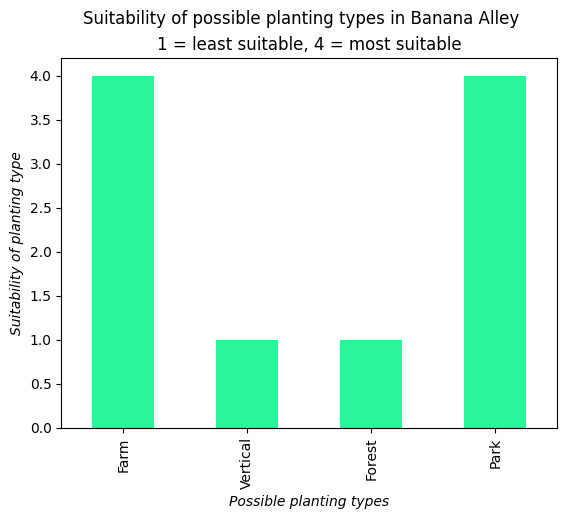

Please enter a number to select the type of planting you would like to do: 
1 = Farm
2 = Vertical
3 = Forest
4 = Park
The table below lists the best endemic species to grow in a Park environment.


,Species,Common_name
30,Austrostipa bigeniculata,"Kneed Spear-grass, Tall Spear-grass, Plains Grass"
134,Eucalyptus camaldulensis var. camaldulensis,River Red Gum
141,Exocarpos cupressiformis,"Wild Cherry, Cherry Ballart"
233,Oxalis perennans,"Grassland Wood-sorrel, Scour Grass"
345,Velleia paradoxa,Spur Velleia
370,Allocasuarina verticillata,"Drooping Sheoak, Coast Sheoak"
424,Calocephalus citreus,Lemon Beauty-heads
547,Leptorhynchos squamatus subsp. squamatus,Scaly Buttons
573,Microlaena stipoides var. stipoides,Weeping Grass
575,Microseris walteri,"Yam Daisy, Murnong"


In [9]:
# Make a list of the locations from the lane dataframe
database = (lane_df['Address'].to_list())
# PART 1: Initial User Input
# Ask user to type in name of lane as an input function
location = input("Please input the name of your lane in the form \"Banana Alley\"")
# Check if the location is in the database, follow steps if it is
if location in database:
    # If location is in the dataframe, print a confirmation message
    print(f'The location you wish to plant is {location}')
    # Make a new interim dataframe from the single location only (1 row in size)
    df_interim = lane_df[lane_df['Address'] == location]
    # Choose only the rank columns and transpose the dataframe
    df_interim = df_interim[['Farm','Vertical','Forest','Park']].T
    # Add index column and rename new columns
    df_interim = df_interim.reset_index().rename(columns={"index":"type"})
    df_interim = df_interim.rename(columns={df_interim.columns[1]:"rank"})	
    # PART 2: Plot a graph of location planting options from user input
    # Print a message stating to use graph to shoose a planting type
    print("View the graph to decide which type of planting you would like to undertake")
    # Plot the interim dataframe as a bar graph
    df_interim.plot(x="type", y=["rank"], kind="bar", color="#2af598", legend=None)
    plt.title("1 = least suitable, 4 = most suitable")
    plt.suptitle(f"Suitability of possible planting types in {location}")
    plt.xlabel('Possible planting types', style='italic')
    plt.ylabel('Suitability of planting type', style='italic')
    plt.show()
    # PART 3 User makes selection from a list of options
    # Function for user selection of planting type
    def user_type_selection():
        # Set planting type options
        options = ["Farm", "Vertical", "Forest","Park"]
        # Set instructions for the user
        print("Please enter a number to select the type of planting you would like to do: ")
        # For loop to create list of options for user to view
        for idx, element in enumerate(options):
            print("{} = {}".format(idx + 1, element))
        # Instructions for user input
        i = input("Make your planting selection by entering a number from 1 to 4: ")
        # If statement to check if user input is valid and return the planting type as message
        if 0 < int(i) <= len(options):
            choice = int(i) - 1
            global planting_type 
            planting_type = options[choice]
        # Else statement to get user to recheck input if their option is not valid
        else:
            print("Please choose a number from 1 to 4")
    # Creates variable for user planting selection function and calls method
    type_selection = user_type_selection()
    type_selection
    # PART 4: User is returned a list of suitable endemic plants
    # Function to search the plant dataframe for results greater than 3 in the selected planting type and return these
    def plant_suggestions():
        # If planting type is farm
        if planting_type == 'Farm':
            print(f'{planting_type} planting is seasonal produce. You will be taken to the Yardwork Melbourne planting guide website.')
            # Auto direction to open a new browser window to a seasonal planting guide
            root = Tk()
            root.title("WebBrowsers")
            root.geometry("640x480")
            webbrowser.open("https://yardwork.com.au/gardening-guides/what-to-plant-now-melbourne/")
        # If planting type is not farm, match to the correct column in the other dataframe
        else:
            print(f'The table below lists the best endemic species to grow in a {planting_type} environment.')
            # Choose values in planting type that are equal to 3.2 (highest) rating
            df_interim_plant = plant_df[plant_df[planting_type] == 3.2]
            # Set display options for dataframe and print it
            pd.set_option('display.max_rows', None)
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', 1000)
            pd.set_option('display.colheader_justify', 'center')
            pd.set_option('display.precision', 3)
            display(df_interim_plant[["Species","Common_name"]])
    
    # Creates variable for plant suggestions function and calls method 
    plant_list = plant_suggestions()
    plant_list

# If location is not in database:
else:
    print(f'Sorry, {location} is not in the data base, please check spelling or input format.')
    


In [16]:
!jupyter nbconvert --to html laneways_endemic_species.ipynb

[NbConvertApp] Converting notebook laneways_endemic_species.ipynb to html
[NbConvertApp] Writing 666503 bytes to laneways_endemic_species.html
